In [12]:
import re
import numpy as np
import pandas as pd
import sounddevice as sd
from matplotlib import pyplot as plt
from datetime import datetime
from scipy.io.wavfile import write

# Plotting a single file

In [13]:
filename='file'

In [14]:
file = open(filename+".txt", "r")
string=file.read()
string=string.replace("\x00","")
string

'[2022-01-11 00:39:31.190572](-02280)(-01648)(-00720)(-00912)(-01784)(-01952)(-01944)(-02640)(-01808)(-01888)(-02384)(-02824)(-03136)(-03048)(-02384)(-01888)(-01088)(-01640)(-02256)(-02240)(-02576)(-03072)(-01824)(-01968)(-01568)(-00928)(-01488)(-01784)(-01520)(-01824)(-02088)(-01968)(-02048)(-02576)(-02392)(-02096)(-02360)(-01496)(-00720)(-01264)(-01336)(-01816)(-03496)(-03856)(-03696)(-04128)(-03192)(-02384)(-02112)(-01616)(-01136)(-02024)(-01920)(-01520)(-02928)(-03400)(-03000)(-03872)(-03592)(-02400)(-02312)(-02872)(-00792)(-01560)(-02144)(-01888)(-02120)(-01704)(-00432)(-01264)(-01016)(-01952)(-02920)(-02552)(-01672)(-01432)(-01720)(-01632)(-02504)(-02864)(-02976)(-02720)(-02816)(-01704)(-01496)(-01840)(-01928)(-02080)(-03504)(-03016)(-02336)(-01752)(-01560)(-01768)(-02880)(-03344)(-03736)(-03368)(-02736)(-03160)(-02440)(-01864)(-01832)(-01664)(-01512)(-01136)(-01952)(-01200)(-01104)(-01824)(-02328)(-02264)(-02640)(-01192)(-00848)(-01344)(-01632)(-02976)(-03112)(-03440)(-03672)(-0

In [15]:
pattern = "\[(.*?)\]"
timestamps = re.findall(pattern, string)
print("First timestamp: "+ str(timestamps[0]))
print("Last timestamp:  "+ str(timestamps[-1]))
date_format = '%Y-%m-%d %H:%M:%S.%f' 
# Change  fmt according to the value you get because the timestamp is generated by the server and may vary for every server
totaltime=datetime.strptime(timestamps[-1], date_format)-datetime.strptime(timestamps[0], date_format)
timeinsec=totaltime.total_seconds()
print("Total recording time for this file: "+ str(timeinsec)+' secs')

First timestamp: 2022-01-11 00:39:31.190572
Last timestamp:  2022-01-11 00:40:24.111743
Total recording time for this file: 52.921171 secs


The total microphone readings are: 916608
Total Microphone readings plotted: 916608
Sample Rate of microphone is: 17320.25166260966


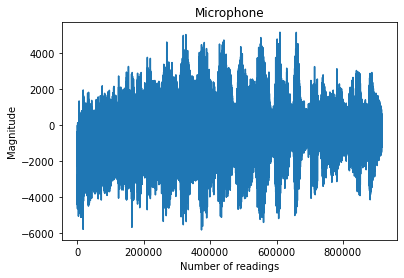

In [16]:
pattern = "\((.*?)\)"
Microphone_temp = re.findall(pattern, string)
Microphone_temp=[re.sub('\[(.*?)\]', '', x) for x in Microphone_temp]
Microphone=[x for x in Microphone_temp if len(x)<12]
Microphone_numpy=np.array(Microphone)
Microphone_numpy = Microphone_numpy.astype(int)
Sr=len(Microphone_temp)/timeinsec
print("The total microphone readings are: "+str(len(Microphone_temp)))
print("Total Microphone readings plotted: "+str(len(Microphone_numpy)))
print("Sample Rate of microphone is: "+ str(Sr))

plt.ylabel('Magnitude')
plt.xlabel('Number of readings')
plt.title('Microphone')
plt.plot(Microphone_numpy)

# Play  and Save sound as Wav (If required)

In [17]:
print("The sampling rate is: "+ str(int(Sr)))
scaled = np.int16(Microphone_numpy/np.max(np.abs(Microphone_numpy)) * 32767)
write(filename+'.wav', int(Sr), scaled)

The sampling rate is: 17320


In [18]:
sd.play(scaled, Sr)

### Export the sound data as csv file (If required) 

In [19]:
sound_df=pd.DataFrame(Microphone_numpy,columns=['Microphone'])
sound_df.to_csv('Microphone_'+filename+'.csv',encoding='utf-8')